In [1]:
# Step 1: Import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Step 2: Load the dataset
df = pd.read_csv('heart.csv')

# Rename 'output' to 'target' if needed
if 'output' in df.columns:
    df.rename(columns={'output': 'target'}, inplace=True)

# Show basic structure
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nInfo:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nFirst 5 rows:")
df.head()


Shape: (303, 14)

Columns: ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'target']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Missing values:
 age         0
sex         0
cp          0

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


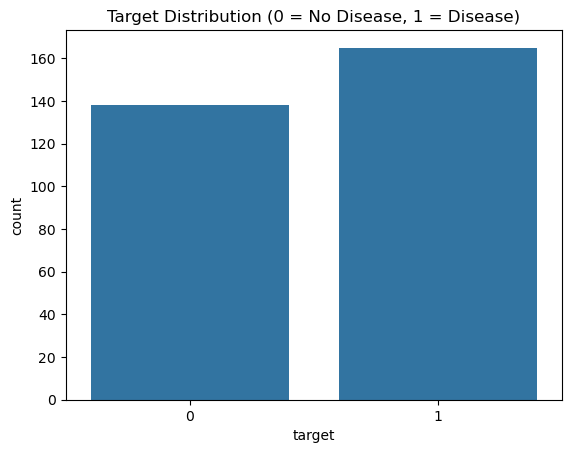

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
# Step 3: Target distribution
sns.countplot(x='target', data=df)
plt.title('Target Distribution (0 = No Disease, 1 = Disease)')
plt.show()

# Summary statistics
df.describe()


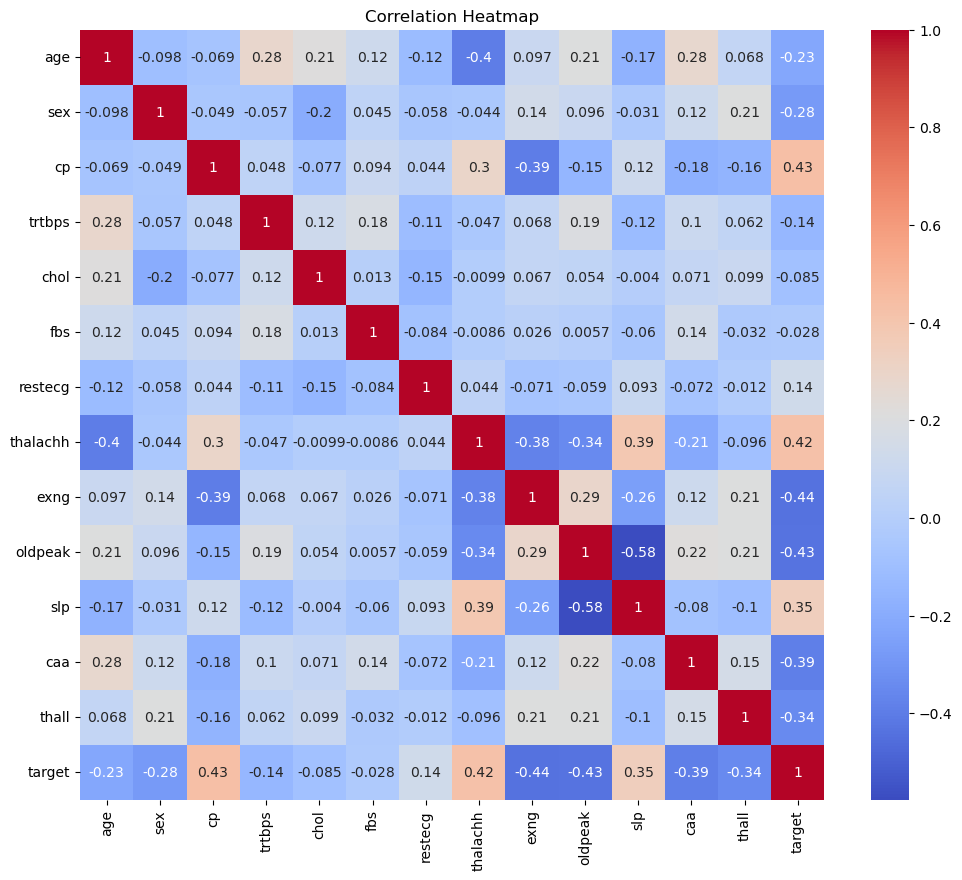

Available columns in df:
 ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'target']
Closest match to 'thalach': ['thalachh', 'thall']
Closest match to 'cp': ['cp']
Closest match to 'chol': ['chol']
Closest match to 'target': ['target', 'age']
Closest match to 'age': ['age', 'target']


In [4]:
# Step 4: Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Check correct column names
print("Available columns in df:\n", df.columns.tolist())

# Check for spelling mistakes in column names
import difflib
for col in ['thalach', 'cp', 'chol', 'target', 'age']:
    matches = difflib.get_close_matches(col, df.columns)
    print(f"Closest match to '{col}': {matches}")


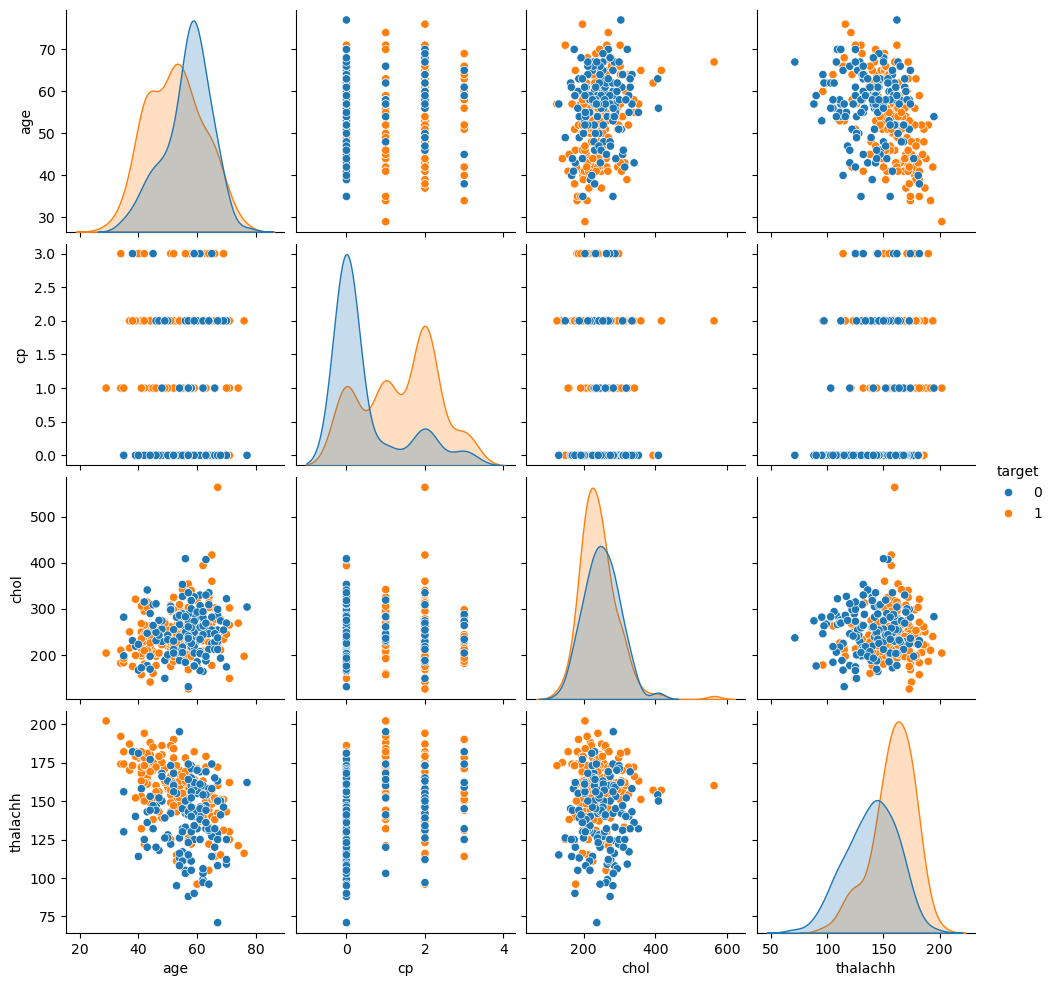

In [5]:
# ✅ Fixed pairplot using correct column names
sns.pairplot(df[['age', 'cp', 'chol', 'thalachh', 'target']], hue='target')
plt.show()


In [6]:
# Step 5: Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


In [7]:
# Step 6: Define and train models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)


In [8]:
# Step 7: Accuracy of each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.8033
Random Forest Accuracy: 0.8197
SVM Accuracy: 0.8361
KNN Accuracy: 0.8033
Decision Tree Accuracy: 0.6885


In [9]:
# Step 8: Evaluate best model
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[18 10]
 [ 2 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61



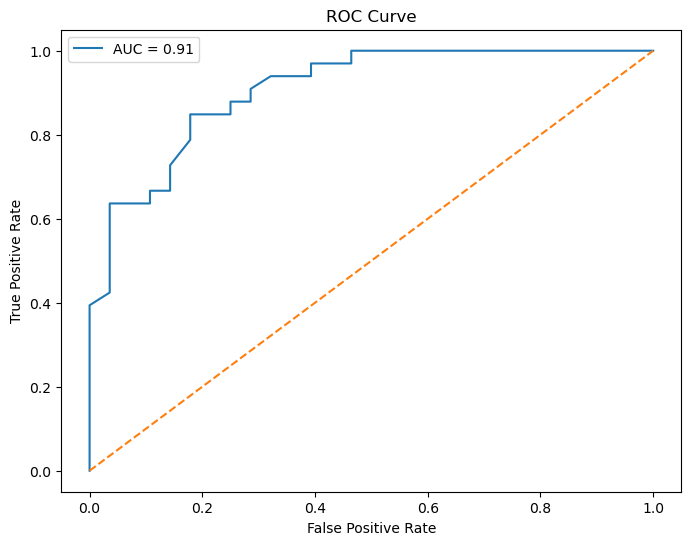

Logistic Regression CV Accuracy: 0.8116 ± 0.0656
Random Forest CV Accuracy: 0.8216 ± 0.0621
SVM CV Accuracy: 0.8283 ± 0.0556
KNN CV Accuracy: 0.8184 ± 0.0616
Decision Tree CV Accuracy: 0.7417 ± 0.0699


In [10]:
# Step 9: ROC curve
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=10)
    print(f"{name} CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


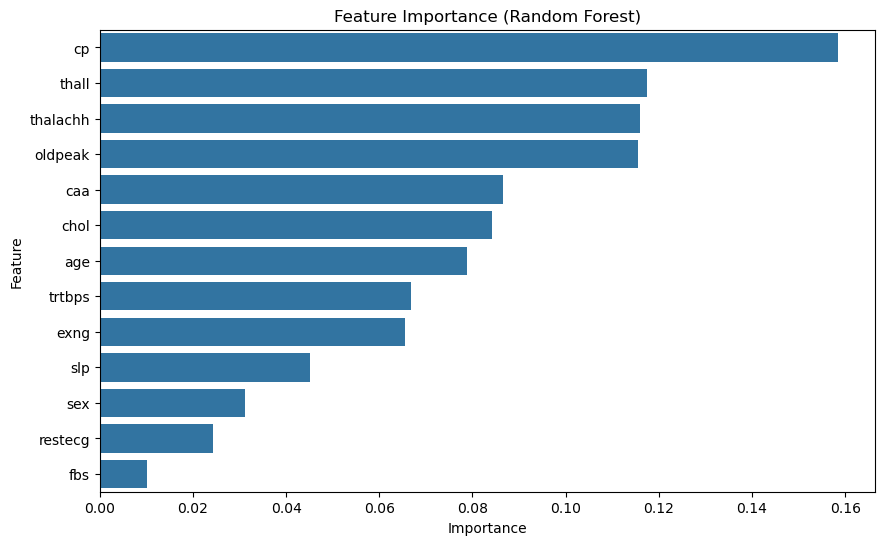

Best Parameters: {'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Score: 0.84328231292517


In [11]:
# Step 10: Feature importance
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

importances = best_model.feature_importances_
features = df.columns[:-1]

imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
imp_df = imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=imp_df)
plt.title("Feature Importance (Random Forest)")
plt.show()

# Optional: Hyperparameter tuning
params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 4, 8],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


In [12]:
pip install xgboost lightgbm


In [13]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8032786885245902

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61



In [14]:
pip install shap eli5


Note: you may need to restart the kernel to use updated packages.


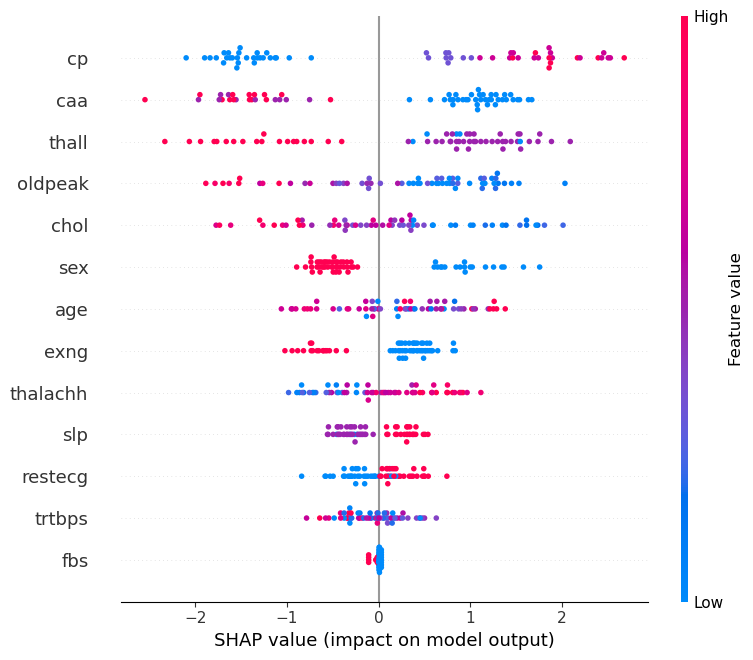

In [15]:
import shap

explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=df.columns[:-1])


In [16]:
!pip install -U scikit-learn


In [18]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgb_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=df.columns[:-1].tolist())


Weight,Feature
0.1082 ± 0.0445,caa
0.0492 ± 0.0293,age
0.0393 ± 0.0262,sex
0.0262 ± 0.0894,cp
0.0197 ± 0.0321,thall
0.0197 ± 0.0131,trtbps
0.0131 ± 0.0321,exng
0.0131 ± 0.0382,restecg
0.0066 ± 0.0445,oldpeak
0.0066 ± 0.0262,thalachh


In [19]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [24]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

model = joblib.load('heart_model.pkl')  # Save your model with joblib

st.title("💖 Heart Disease Prediction App")

age = st.slider("Age", 20, 80)
cp = st.selectbox("Chest Pain Type (0–3)", [0, 1, 2, 3])
thalach = st.slider("Max Heart Rate Achieved", 60, 200)
oldpeak = st.slider("ST Depression", 0.0, 6.0)

input_data = np.array([[age, cp, thalach, oldpeak, 0, 0, 0, 0, 0, 0, 0, 0, 0]])  # Fill others as needed
prediction = model.predict(input_data)

if st.button("Predict"):
    st.success("Disease Risk: Positive 💔" if prediction[0] == 1 else "No Disease ❤️")


2025-07-01 10:12:04.993 
  command:

    streamlit run E:\anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-01 10:12:04.998 Session state does not function when running a script without `streamlit run`


In [23]:
import joblib

# Assume model ka naam hai xgb_model
joblib.dump(xgb_model, 'heart_model.pkl')


['heart_model.pkl']